<div align="center">
    <h1><u>Lab 01</u></h1>
</div>

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2 align="center">
    <u>Task 01</u>
</h2>

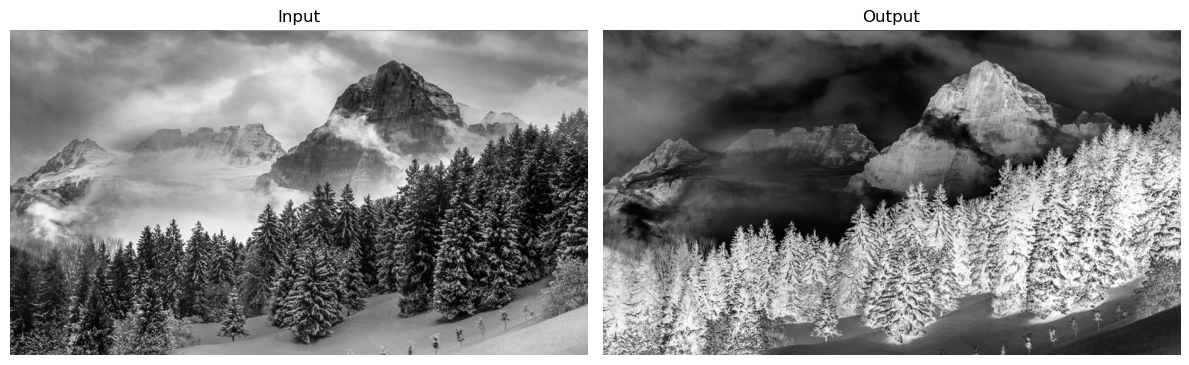

In [150]:
"""
Reading the image & converting image colour format from BGR -> RGB
"""
img = cv2.imread("images/Task1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

"""
Invert all pixel values in the image
This will transform bright areas to dark and dark areas to bright (inverting)
"""
inverted_img = 255 - img

"""
Gamma value to enahnce the contrast between dark background and bright trees
> 1 to make the dark areas darker (mainly just played around to match the sample output from the spec)
"""
gamma = 1.4

# normalising the inverted image to [0, 1] for gamma correction
normalised_img = inverted_img / 255.0

"""
Apply gamme correction by raising each pixel value to the power of the gamme value
Increases contrast, making dark areas darker and the light areas stay the same
"""
gamme_correction = np.power(normalised_img, gamma)

# back to [0,255] standard range and converting it back to unit-8
nighttime_img = (gamme_correction * 255).astype(np.uint8)


"""
Displaying the image
"""
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Input")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(nighttime_img)
plt.title("Output")
plt.axis("off")

plt.tight_layout()
plt.show()

<h2 align="center">
    <u>Task 02</u>
</h2>
Median filtering in this case was the better method to remove the grainy noise from the input. Unlike Gaussian filtering, which averages the pixel values, median filtering replaces each filter with a median value from its neighbourhood.

This approach effectively eliminates outlier noise values without compromising edge integrity. The input of panda contained sharp transitions between black and white areas which needed to be preserved.

Hence, the median filter is better here as it maintains these edge boundaries while removing isolated noise pixels, which results in a cleaner image shown below.

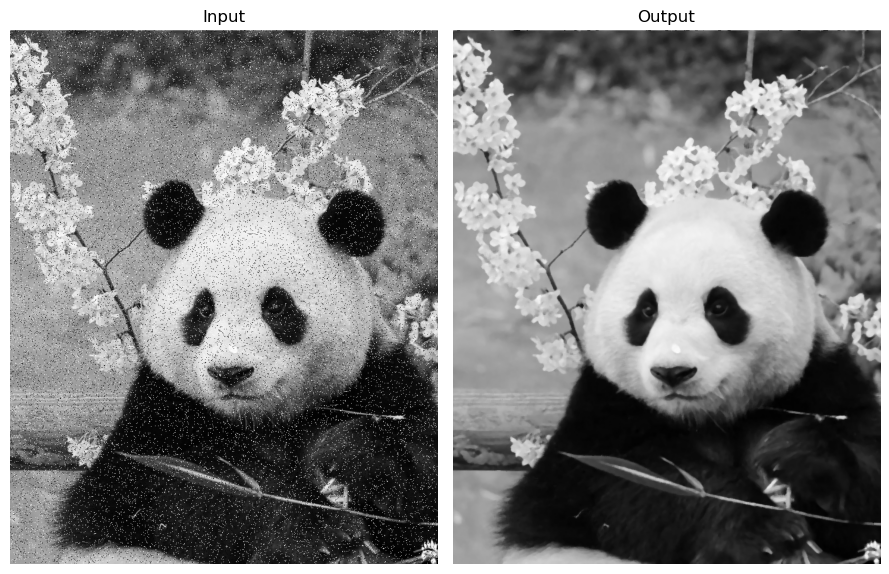

In [114]:
"""
Reading the image & converting image colour format from BGR -> RGB
"""
img = cv2.imread("images/Task2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Applying median filter, kernel size = 5
median_filtered = cv2.medianBlur(img, 5)

"""
Displaying the image
"""
plt.figure(figsize=(9,6))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Input")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(median_filtered)
plt.title("Output")
plt.axis("off")

plt.tight_layout()
plt.show()

<h2 align="center">
    <u>Task 03</u>
</h2>

For this input, unsharp masking was the better technique, as it enhances edges by subtracting a blurred version of the image from the original, creating a mask that highlights high-frequency details. When this mask is added back to the original image with the weight of $5.0$, it accentuates edges while preserving the overall structure.

Laplacian sharpening, being a second-order derivative operator, amplifies noise, produces harsh artificial-looking edges with potential ringing artifacts. Unsharp masking is able to provide a more natural enhancement to the input by selectively boosting existing details. 

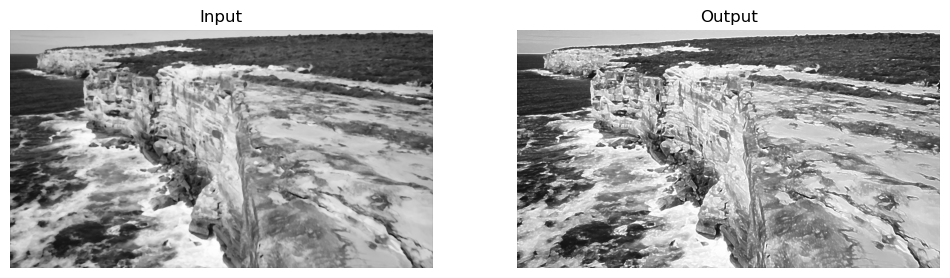

In [166]:
"""
Reading the image & converting image colour format from BGR -> RGB
"""
img = cv2.imread("images/Task3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Gaussian blur with kernel = 5 x 5 and sigma = 1
blurred = cv2.GaussianBlur(img, (5,5), 4)

# Sharpening mask, sub blurred img with original
sharpening_mask = cv2.subtract(img, blurred)

# add weighted mask back to the original
sharpened = cv2.addWeighted(img, 1.0, sharpening_mask, 5.0, 0)


"""
Display the image
"""
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Input")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sharpened)
plt.title("Output")
plt.axis("off")

plt.show()